In [1]:
#Task4: Restaurant Chains 

#Identify if there are any restaurant chains present in the dataset.

#Analyze the ratings and popularity of different restaurant chains.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Dataset .csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
restaurant_counts = df['Restaurant Name'].value_counts()


In [5]:
chains = restaurant_counts[restaurant_counts > 1]
chains.head(10)


Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

In [6]:
chains_table = pd.DataFrame({
    "Restaurant Chain": chains.index,
    "Number of Outlets": chains.values
})

chains_table.head(10)


,Restaurant Chain,Number of Outlets
0,Cafe Coffee Day,83
1,Domino's Pizza,79
2,Subway,63
3,Green Chick Chop,51
4,McDonald's,48
5,Keventers,34
6,Pizza Hut,30
7,Giani,29
8,Baskin Robbins,28
9,Barbeque Nation,26


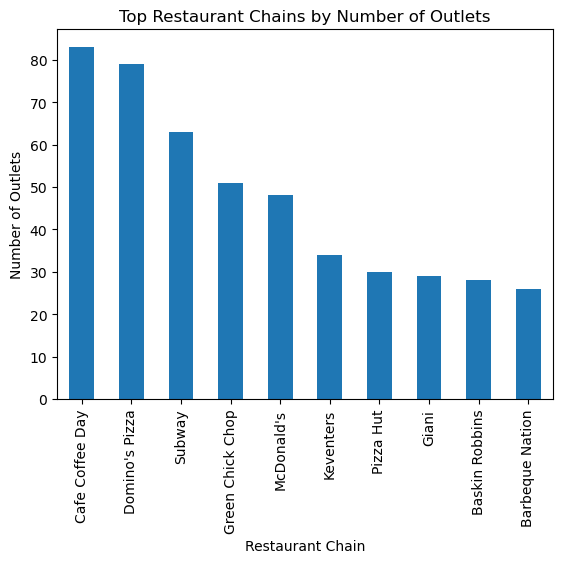

In [13]:
top_chains = chains.head(10)

plt.figure()
top_chains.plot(kind='bar')
plt.title("Top Restaurant Chains by Number of Outlets")
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.xticks(rotation=90)
plt.show()


In [8]:
chain_names = chains.index
df_chains = df[df['Restaurant Name'].isin(chain_names)]


In [9]:
chain_rating = df_chains.groupby('Restaurant Name')['Aggregate rating'].mean()
top_chain_rating = chain_rating.sort_values(ascending=False).head(10)

top_chain_rating


Restaurant Name
Talaga Sampireun             4.900
Silantro Fil-Mex             4.850
AB's Absolute Barbecues      4.850
AB's - Absolute Barbecues    4.825
Naturals Ice Cream           4.800
Gymkhana                     4.700
The Cheesecake Factory       4.650
Dishoom                      4.600
Garota de Ipanema            4.600
Chili's                      4.580
Name: Aggregate rating, dtype: float64

In [10]:
chain_votes = df_chains.groupby('Restaurant Name')['Votes'].mean()
top_chain_votes = chain_votes.sort_values(ascending=False).head(10)

top_chain_votes


Restaurant Name
Truffles                     4841.000000
Joey's Pizza                 3903.500000
AB's - Absolute Barbecues    3350.000000
Big Chill                    2713.250000
Big Yellow Door              2503.666667
Out Of The Box               2450.000000
Saravana Bhavan              2412.666667
Olive Bistro                 1854.000000
Talaga Sampireun             1838.000000
SpiceKlub                    1825.500000
Name: Votes, dtype: float64

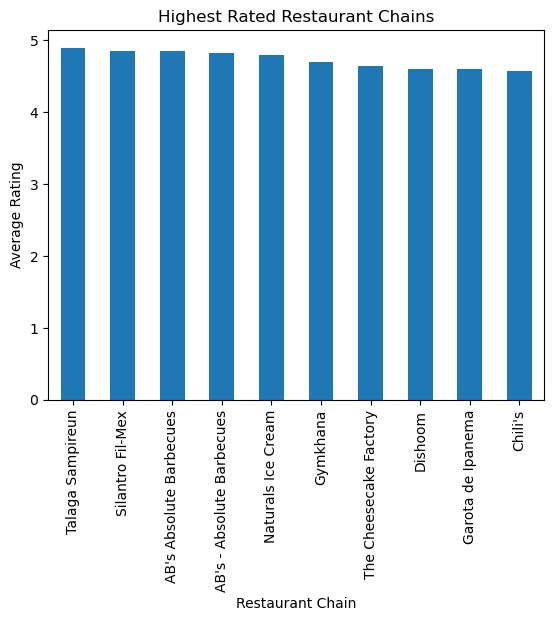

In [12]:
plt.figure()
top_chain_rating.plot(kind='bar')
plt.title("Highest Rated Restaurant Chains")
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()
